# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

## Responses

- Showing these as an area chart could be useful if you wanted to understand nitrate AND phosphate levels in water samples over time. The additive nature of the area chart shows the spikes in April and December across both nitrates and phosphate. The area chart is not useful for comparing the relationship between the two substances. It is very difficult to understand the phosphate trends as it is added to the nitrate trend.
- I would show this as one plot with two lines. One line reprasenting nitrate and the other line representing phosphate. This would make it easier to compare how each substance is trending relative to each other. It would also be helpful to have some comparative values like % difference between each substance.  

In [20]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_32848\2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

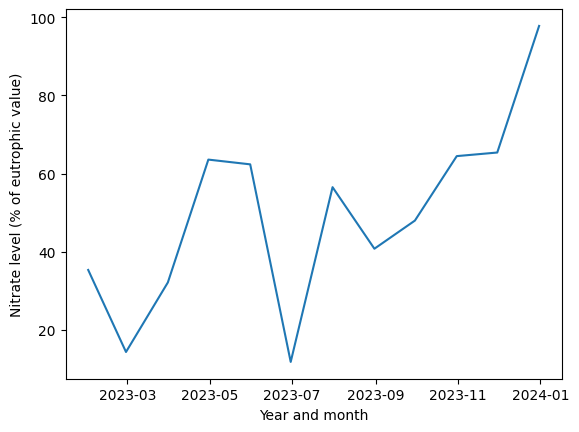

In [3]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_32848\1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

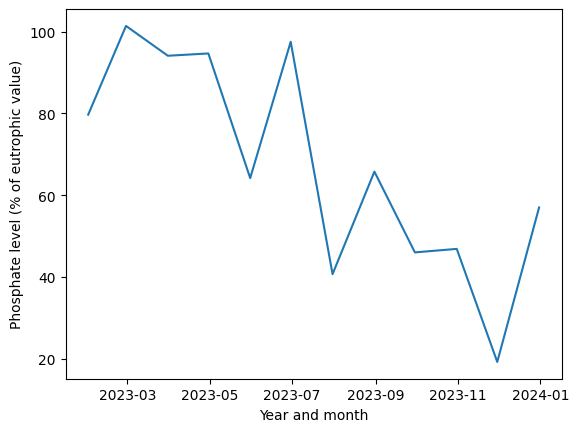

In [4]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

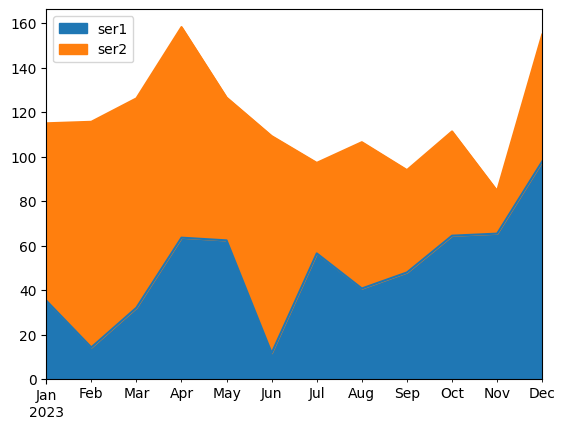

In [5]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

## Priceline Dataset Analysis

### Conclusions
- There is very weak correlation between any of the columns in this dataset. The only correlation worth mentioning is that flights with more stops have longer travel times.
- I suspect this dataset will need to be replaced.


In [25]:
# Load the dataset
fname = "priceline_clean_no_encode.csv"
df = pd.read_csv(fname)

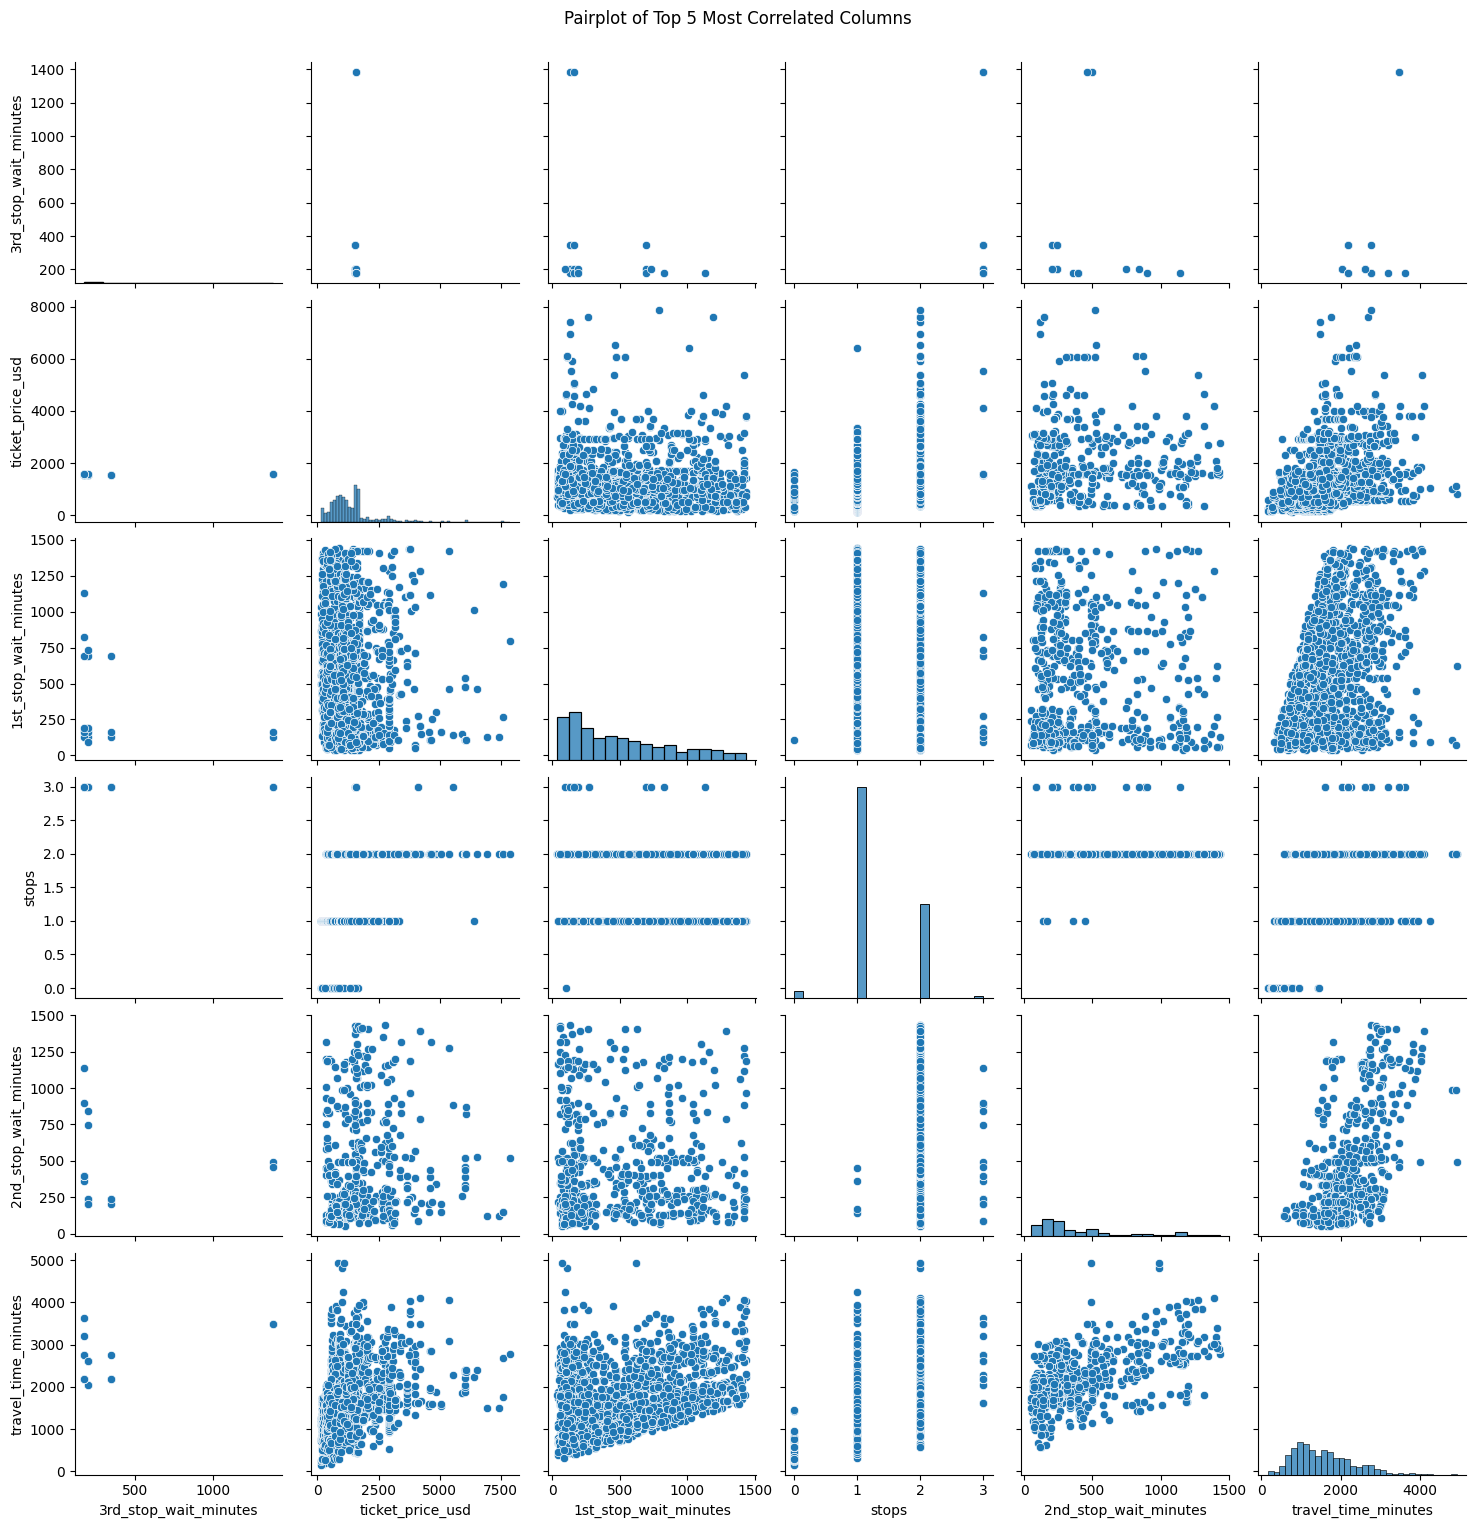

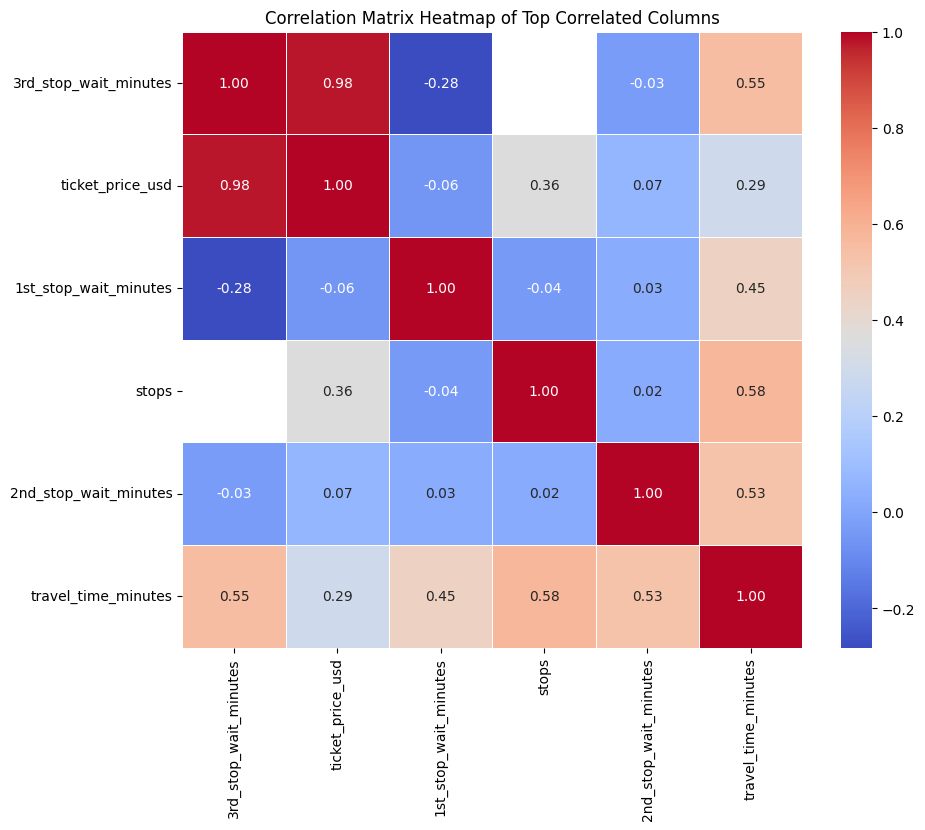

In [27]:
# Select numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Unstack and sort by absolute correlation, excluding self-correlations
corr_unstacked = corr_matrix.abs().unstack().sort_values(ascending=False)
corr_unstacked = corr_unstacked[corr_unstacked < 1]

# Get the top 5 most strongly correlated pairs
top_5_pairs = corr_unstacked.head(10).index.tolist()

# Extract unique columns involved in those pairs
top_columns = list(set([col for pair in top_5_pairs for col in pair]))

# Create pairplot
sns.pairplot(numeric_df[top_columns])
plt.suptitle('Pairplot of Top 5 Most Correlated Columns', y=1.02)
plt.show()

# Create heatmap for those columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df[top_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap of Top Correlated Columns')
plt.show()


## Flight Delay Dataset Analysis

### Conclusions
- The only correlation with target variables are that arrival and deparate delay are highly correlated. This is fairly obvious given that if a flight is delayed taking off it will be delayed landing.
- There is slight, yet weak, correlation between arrival delay and scheduled hour of day, rain, and snow. 
- I suspect the very low correlation is related to the heavily imbalanced dataset. Basically, a much large proportion of slights are on-time and therefore it drowns out the affects on flight delays. This will need to be accounted for in the model design.

In [ ]:
# Load the dataset
fname = "delay_data_clean_no_encode.csv"
dataset_name = "delay"
df = pd.read_csv(fname)

In [23]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()

,depdelay,arrdelay,marketshareorigin,marketsharedest,hhiorigin,hhidest,nonhubairportorigin,smallhubairportorigin,mediumhubairportorigin,largehubairportorigin,...,windgustdummy,windgustspeed,raindummy,raintracedummy,snowdummy,snowtracedummy,originmetropop,originmetrogdppercapita,destmetropop,destmetrogdppercapita
depdelay,1.000000,0.936814,0.005467,-0.013223,-0.003896,-0.014420,-0.024013,-0.012410,0.012445,0.018587,...,0.051078,0.034830,0.091178,0.027539,0.042967,0.023762,0.040070,0.017945,0.032936,0.013572
arrdelay,0.936814,1.000000,-0.004960,-0.022106,-0.006622,-0.017527,-0.010440,-0.014269,0.004962,0.015060,...,0.058654,0.040009,0.111091,0.032742,0.079240,0.037541,0.024101,0.000785,0.030340,0.001261
marketshareorigin,0.005467,-0.004960,1.000000,-0.012320,0.716907,0.009704,0.133661,-0.044844,0.040652,-0.112133,...,0.006107,0.007873,0.000078,0.003051,0.000020,-0.001657,-0.037596,0.016355,-0.121747,-0.027724
marketsharedest,-0.013223,-0.022106,-0.012320,1.000000,0.010814,0.723490,0.115165,0.116901,-0.043394,-0.145639,...,-0.011049,-0.008350,-0.013679,-0.011022,-0.002470,-0.007789,-0.120388,-0.024729,-0.043114,-0.006724
hhiorigin,-0.003896,-0.006622,0.716907,0.010814,1.000000,0.010282,0.173234,-0.068782,0.046278,-0.131963,...,0.010790,0.010283,0.001135,0.006784,0.001370,0.003888,-0.060218,0.016961,-0.068933,0.023459
hhidest,-0.014420,-0.017527,0.009704,0.723490,0.010282,1.000000,0.017883,0.018539,-0.059634,0.022022,...,-0.004195,-0.005667,-0.005578,-0.004180,0.000552,-0.004778,-0.067646,0.028091,-0.068546,-0.015893
nonhubairportorigin,-0.024013,-0.010440,0.133661,0.115165,0.173234,0.017883,1.000000,-0.224091,-0.277789,-0.427524,...,-0.012960,0.000508,-0.010403,-0.008679,0.006047,0.016293,-0.272584,-0.271947,0.079831,0.066794
smallhubairportorigin,-0.012410,-0.014269,-0.044844,0.116901,-0.068782,0.018539,-0.224091,1.000000,-0.233376,-0.359171,...,-0.019813,-0.019956,0.009641,0.002708,-0.011842,-0.009747,-0.163656,0.032285,0.070985,0.039587
mediumhubairportorigin,0.012445,0.004962,0.040652,-0.043394,0.046278,-0.059634,-0.277789,-0.233376,1.000000,-0.445238,...,0.010853,0.008329,0.040125,0.024084,-0.002537,-0.008869,0.178199,0.182077,0.022624,0.012278
largehubairportorigin,0.018587,0.015060,-0.112133,-0.145639,-0.131963,0.022022,-0.427524,-0.359171,-0.445238,1.000000,...,0.016269,0.007338,-0.032610,-0.015264,0.005938,0.001254,0.196568,0.047087,-0.138246,-0.095297


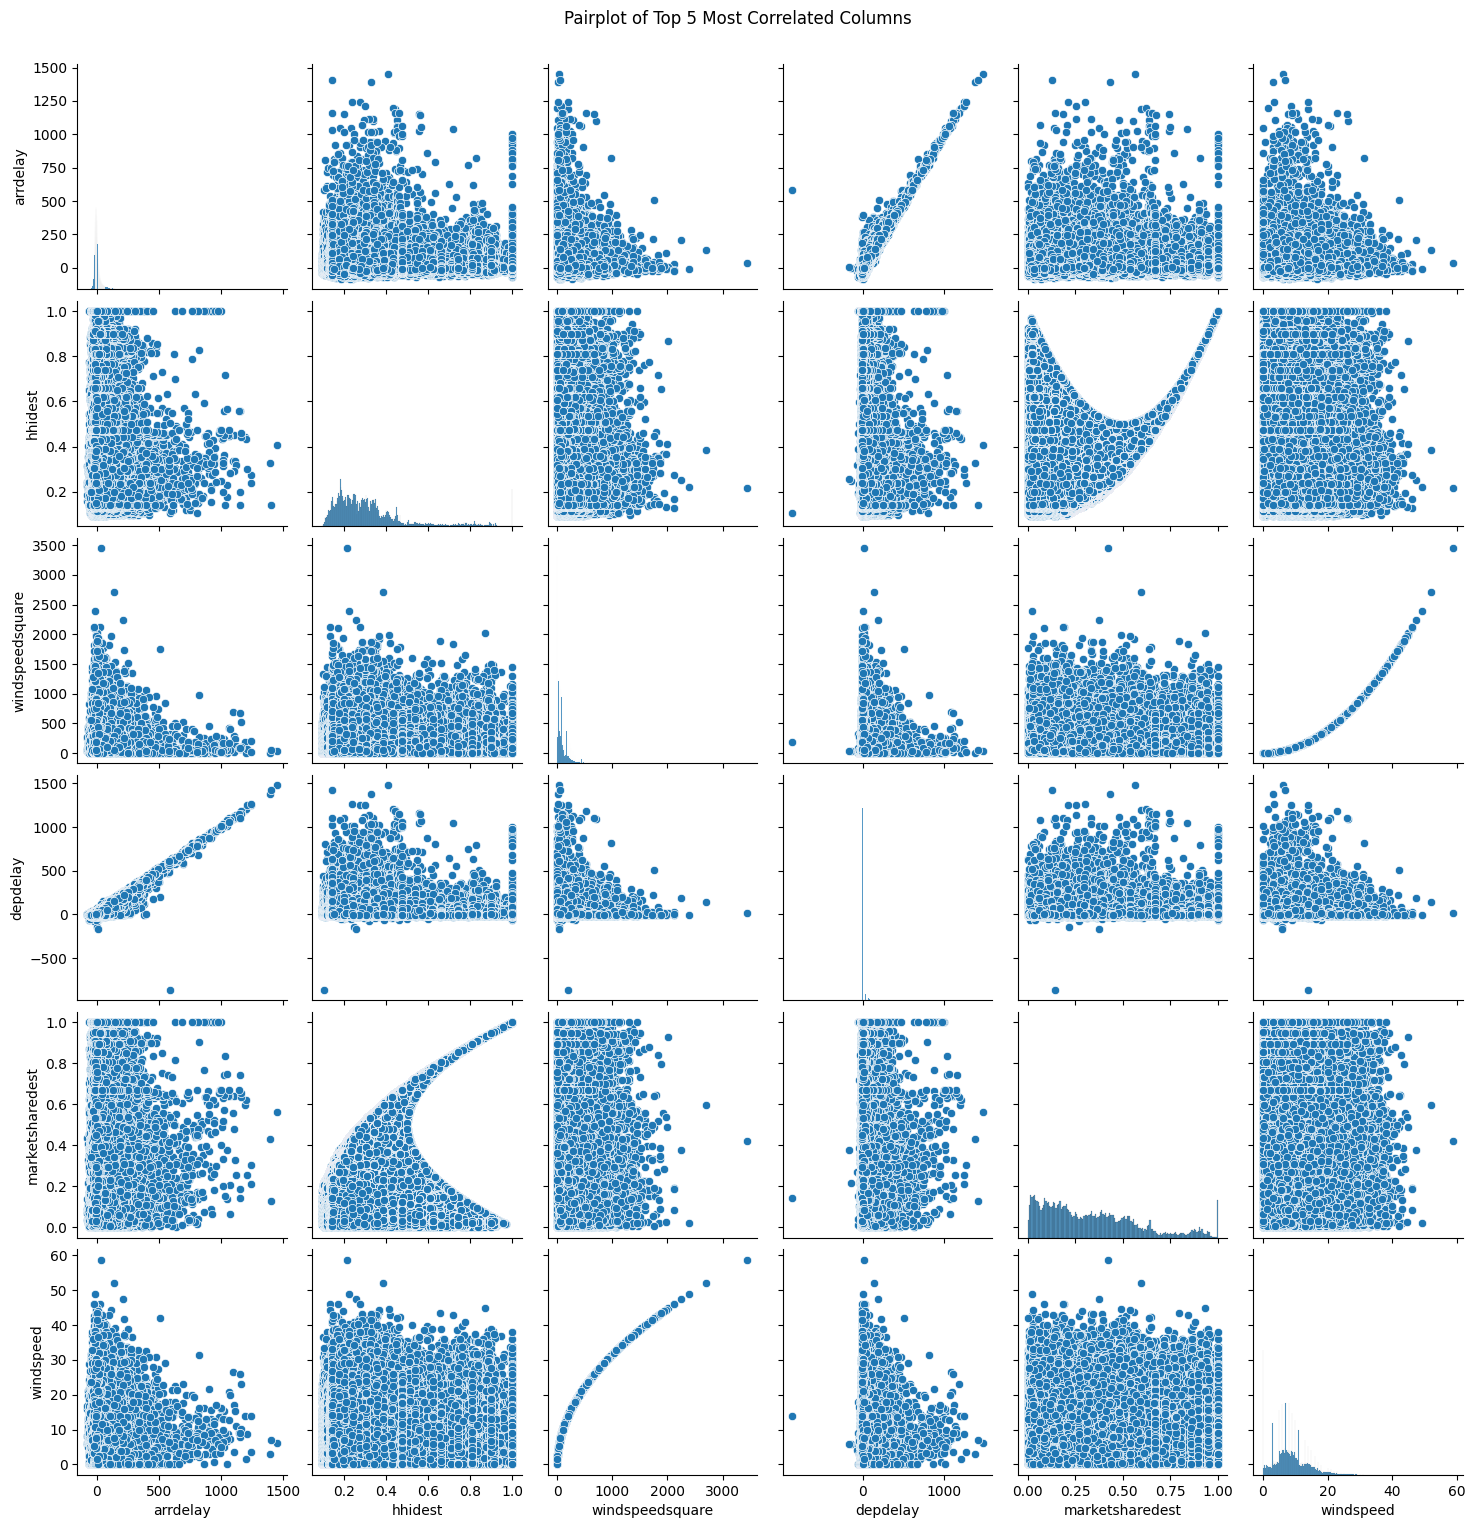

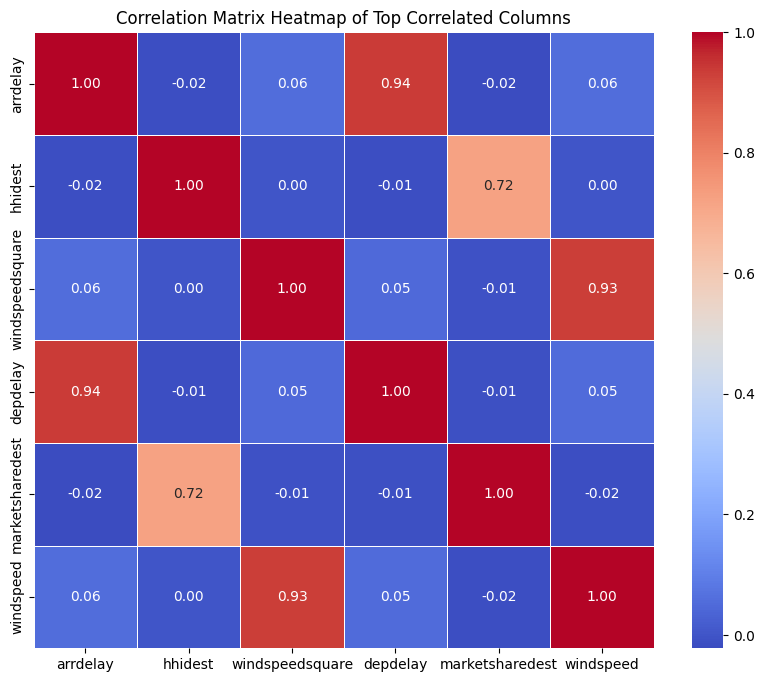

In [24]:
# Select numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Unstack and sort by absolute correlation, excluding self-correlations
corr_unstacked = corr_matrix.abs().unstack().sort_values(ascending=False)
corr_unstacked = corr_unstacked[corr_unstacked < 1]

# Get the top 5 most strongly correlated pairs
top_5_pairs = corr_unstacked.head(5).index.tolist()

# Extract unique columns involved in those pairs
top_columns = list(set([col for pair in top_5_pairs for col in pair]))

# Create pairplot
sns.pairplot(numeric_df[top_columns])
plt.suptitle('Pairplot of Top 5 Most Correlated Columns', y=1.02)
plt.show()

# Create heatmap for those columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df[top_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap of Top Correlated Columns')
plt.show()


## Ontime Flight Dataset

### Conclusions
- There is heavy class imbalance in that most flights are not delayed. This is causing very weak correlations with features. We will need to account for this in modelling.
- There are a lot of highly correlated variables like travel time against wheels up time, distance, etc.

In [29]:
fname = "usdot_onetime_clean_no_encode.csv"
dataset_name = "usdot"
df = pd.read_csv(fname)

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_31692\1566341598.py:3: DtypeWarning: Columns (77,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fname)


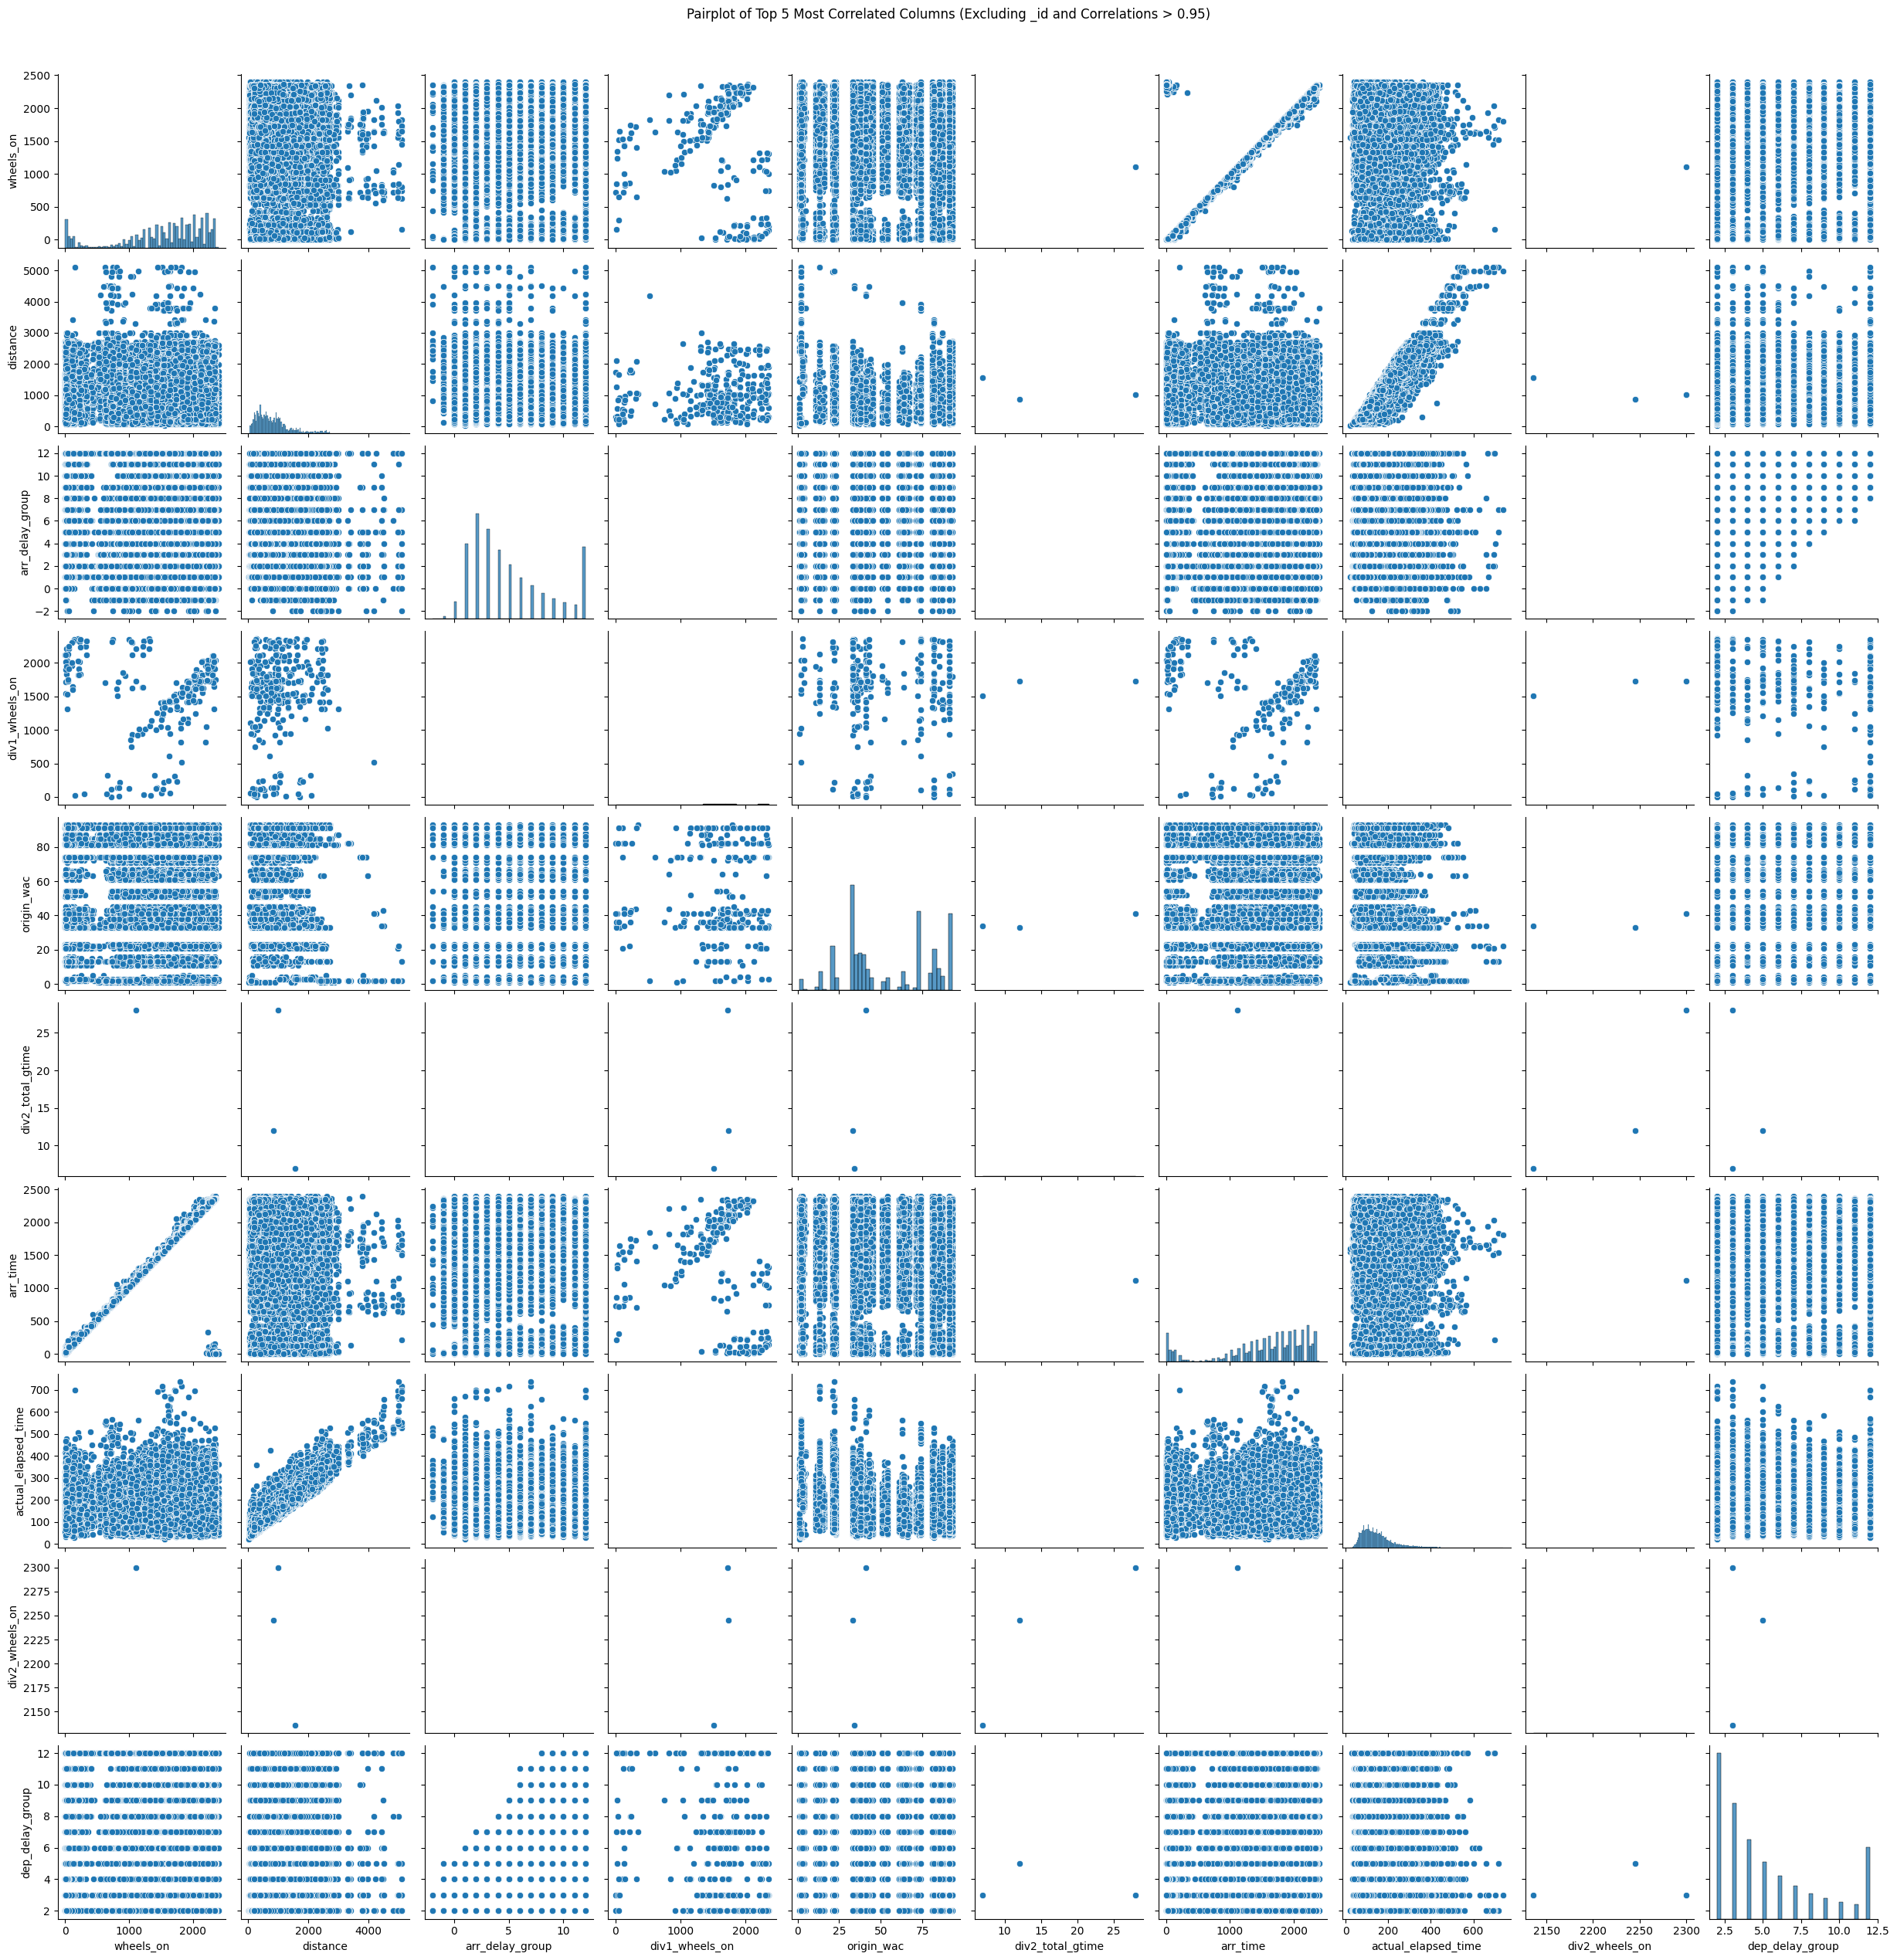

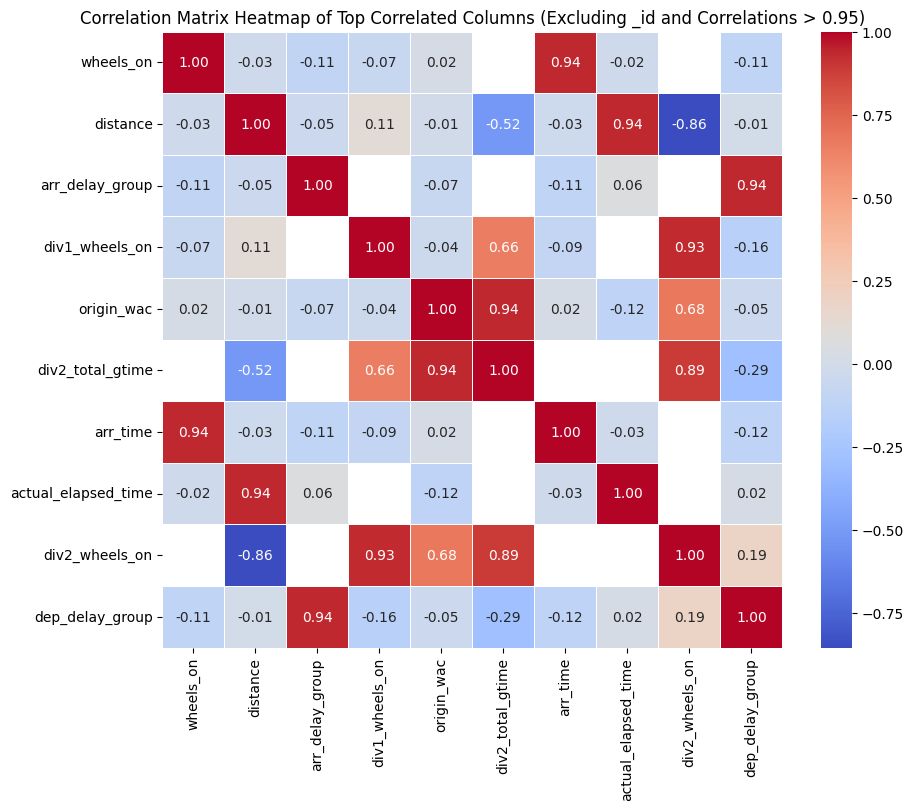

In [35]:
# Select numeric columns, excluding any with '_id' in the column name
numeric_df = df.select_dtypes(include=['number'])
numeric_df = numeric_df.loc[:, ~numeric_df.columns.str.contains('_id')]
numeric_df = numeric_df[numeric_df["dep_delay"] > 30]

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Unstack and sort by absolute correlation, excluding self-correlations and correlations > 0.95
corr_unstacked = corr_matrix.abs().unstack().sort_values(ascending=False)
corr_unstacked = corr_unstacked[(corr_unstacked < 1) & (corr_unstacked <= 0.95)]

# Get the top 5 most strongly correlated pairs
top_5_pairs = corr_unstacked.head(10).index.tolist()

# Extract unique columns involved in those pairs
top_columns = list(set([col for pair in top_5_pairs for col in pair]))

# Create pairplot
sns.pairplot(numeric_df[top_columns])
plt.suptitle('Pairplot of Top 5 Most Correlated Columns (Excluding _id and Correlations > 0.95)', y=1.02)
plt.show()

# Create heatmap for those columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df[top_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap of Top Correlated Columns (Excluding _id and Correlations > 0.95)')
plt.show()


# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

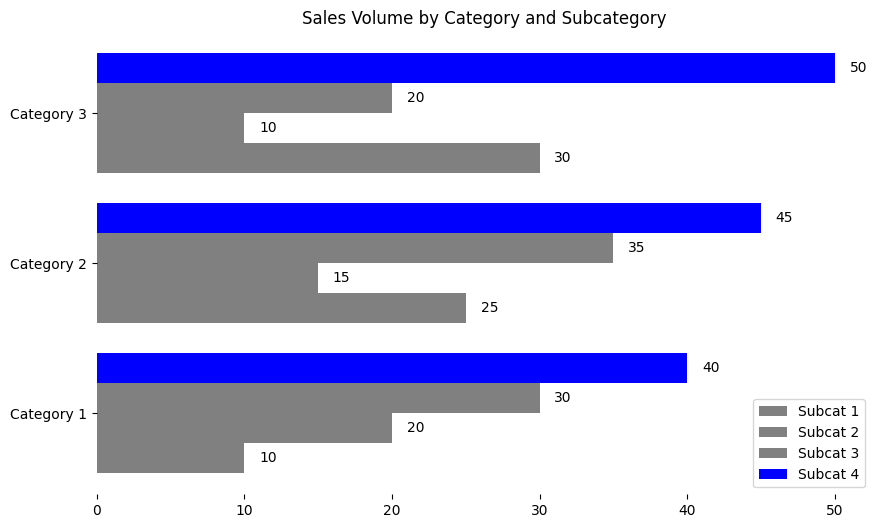

In [ ]:
# Recreating the clustered bar chart from page 88 

import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['Category 1', 'Category 2', 'Category 3']
subcategories = ['Subcat 1', 'Subcat 2', 'Subcat 3', 'Subcat 4']
values = [
    [10, 20, 30, 40],
    [25, 15, 35, 45],
    [30, 10, 20, 50]
]

# Determine the top value in each category
top_values = [max(category) for category in values]

# Create a color map
colors = []
for category in values:
    category_colors = []
    for value in category:
        if value == max(category):
            category_colors.append('blue')
        else:
            category_colors.append('gray')
    colors.append(category_colors)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define bar width and positions
bar_width = 0.2
positions = np.arange(len(categories))

# Plot each subcategory
for i in range(len(subcategories)):
    subcat_values = [values[j][i] for j in range(len(categories))]
    subcat_colors = [colors[j][i] for j in range(len(categories))]
    ax.barh(positions + i * bar_width, subcat_values, bar_width, label=subcategories[i], color=subcat_colors)

# Add text labels and title
ax.set_yticks(positions + bar_width * 1.5)
ax.set_yticklabels(categories)
ax.set_title('Sales Volume by Category and Subcategory')

# Add numeric value labels
for i in range(len(subcategories)):
    for j in range(len(categories)):
        ax.text(values[j][i] + 1, positions[j] + i * bar_width, str(values[j][i]), va='center')

# Remove axis lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Add legend
ax.legend()

plt.show()

